# COGS 108 - Final Project

# Overview

Our project is focused on finding the relationship between income level and diabetes rate in California. We are attempting to see if low income correlates to high diabetes rate in California. We will look into how multiple factors, such as poverty, in-take nutriention, types of in-take food and number of hosipitals, relate to income level and affect diabetes rate in California.

# Names

- Baojun Tang
- Shuyang Miao
- Yijia He
- Juncong Shi

# Research Question

Is there a relationship between the diabetes rate of Californians and their income level?

## Background and Prior Work




  Diabetes is a serious chronic disease as a result of insufficient production of insulin from the pancreas. According to statistics, 30.3 million people have been diagnosed with diabetes in the United States, which encompasses about 9.4% of the total population. It is the seventh leading cause of death and studies have shown that it has been increasingly prevalent in counties of middle to low income. As a group, we are aware of the rising prevalence rate of diabetes in the United States. However, due to the vast amount of data available for use, we have decided to focus our project only on the statistics of diabetes in California. 

  In William Aiken’s article “Diabetes, Obesity, and Income”, he explored the potential relationship between diabetes rate and income level across each county in New York State. In his article, the conclusion expressed a strong relationship between these two factors. In some counties with higher income levels, the residents tend to have lower diabetes rates and vice versa. We were inspired by Aiken’s research in New York state, and we want to explore how income and diabetes are related in California since California and New York are the largest states on the west coast and east coast respectively. The residence in these two states are different in their lifestyle and their diet, so there might be a completely different conclusion concerning the relationship between diabetes and income if our focus is in California.

  Another article “Learning to Address Health Inequality in the United States with a Bayesian Decision NetLearning to Address Health Inequality in the United States with a Bayesian Decision Network” attempted to decrease the longevity gap and health inequality by analyzing a county-level data source in the factors of healthcare, socio-economic, behavior, education, and demographic features. They built a web-application to make quantitative estimates and potential policy decisions for decreasing health inequality based on the factors of population diversity, poverty, preventive quality, smoking, education, exercise and obesity. 
			
References (include links):
- 1)William, Aiken: Diabetes, Obesity and Income at NYC Data Science Academy, Nov 18, 2015 https://nycdatascience.com/blog/student-works/diabetes-obesity-and-income/

- 2)Tavpritesh Sethi,Anant Mittal,Shubham Maheshwari, Samarth Chugh: Learning to Address Health Inequality in the United States with a Bayesian Decision Network , 
https://www.google.com/url?client=internal-element-cse&cx=016314354884912110518:gwmynp16xuu&q=https://www.aaai.org/ojs/index.php/AAAI/article/view/3849/3727&sa=U&ved=2ahUKEwjpgpyeqa_nAhUyIjQIHTuxD5oQFjABegQIBhAB&usg=AOvVaw0ukQNqwBZT8-XagjAp-xOe

# Hypothesis


Californians at higher income levels are less likely to get diabetes than those who are at lower income levels. This is due to differences in eating habits and unequal allocation of medical resources


# Data


- Dataset Name: Income per capita across each county in California
- Link to the dataset: https://en.wikipedia.org/wiki/List_of_California_locations_by_income
- Number of observations: 58

This dataset is from Wikipedia, that is available for the public use. The dataset includes a total of 3 variables with each containing 58 observations. Variables are the county in California, income per capita in each county, the population of each county. This dataset yields information about income per capita in each county in California. Per capita income measures the average income earned per person in a given area in a specified year. This particular dataset presents the estimated average per capita income of each county in California based on numbers collected from 2010 to 2014. We plan to use this dataset to represent the income level of each county in California.





- Dataset Name: Diabetes Atlas County Data
- Link to the dataset: https://gis.cdc.gov/grasp/diabetes/DiabetesAtlas.html#
- Number of observations: 59

This dataset is from the Centers for Disease Control and Prevention of the United States, that is available for the public use. The dataset includes a total of 6 variables with each containing 59 observations. Variables are the county, state, CountyFIPS, percentage, lower limit. This dataset yields information about the percentage of diabetes in each county in California in 2016. We appended the number of hospitals in each county in this dataset for future use. We plan to use this dataset to represent the diabetes rate of each county in California.





- Dataset Name: Average daily intake of nutrients by food source and demographic characteristics
- Link to the dataset: https://www.ers.usda.gov/data-products/food-consumption-and-nutrient-intakes/
- Number of observations: 2

This dataset is from United States Department of Agriculture Economic Research Service (USDA ERS), that is available for the public use. After our modification of the dataset, it includes a total of 9 variables with each containing 2 observations. This dataset yields information about average daily individual nutrient intakes for low-income and high-income groups in California base on numbers collected from 2007 to 2010.





- Dataset Name: Average daily intake of food by food source and demographic characteristics
- Link to the dataset: https://www.ers.usda.gov/data-products/food-consumption-and-nutrient-intakes/
- Number of observations: 2

This dataset is from United States Department of Agriculture Economic Research Service (USDA ERS), that is available for the public use. After our modification of the dataset, it includes a total of 9 variables with each containing 2 observations. This dataset yields information about average daily individual food intakes for low-income and high-income groups in California base on numbers collected from 2007 to 2010..





- Dataset Name: USDA Food Environment Atlas
- Link to the dataset: https://www.ers.usda.gov/data-products/food-environment-atlas/data-access-and-documentation-downloads/
- Number of observations: 58

This dataset is from United States Department of Agriculture Economic Research Service (USDA ERS), that is available for the public use. After our modification, the dataset includes a total of 8 variables with each containing 58 observations. However, in this dataset, we only extracted the variable of poverty rate in each county in California. This dataset is based on numbers collected in the year of 2018. We plan to use this dataset to represent the income level of each county in California.





- Dataset Name: List of hospitals in California
- Link to the dataset: https://en.wikipedia.org/wiki/List_of_hospitals_in_California#Yuba_County
- Number of observations: 58

This particular wikipedia page keeps a record of all hospitals in California. We came up with our own dataset by mannually counting the number of hospitals in each county. We then combined this dataset with the diabetes rate by county dataset for convenience. We attempt to use this dataset to address the general allocation of medical recourse in California. This dataset is based on numbers collected in the year of 2018. We plan to use this dataset to represent the allocation of medical resources throughout counties in California.

# Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})

import seaborn as sns
sns.set()
sns.set_context('talk')

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

import pandas as pd
import requests
import bs4
from bs4 import BeautifulSoup

### Loading The Datasets

In [2]:
#Scraping target wikipedia page
wiki = "https://en.wikipedia.org/wiki/List_of_California_locations_by_income"
page = requests.get(wiki)
soup = BeautifulSoup(page.content, 'html.parser')

In [3]:
right_table = soup.find("table", class_ = "wikitable sortable")

In [4]:
#Codes from A4
#Finding and extracting columns in the target table from the website 
list_a, list_b, list_c = [],[],[]
for row in right_table.findAll('tr'):
    
    cells = row.findAll('td')
    
    #Skip rows that are not 6 columns long 
    if len(cells) != 6:
        continue

    #Catch columns of interest
    try:
        list_a.append(cells[0].find('a').text)
        list_b.append(cells[1].find(text=True))
        list_c.append(cells[3].find(text=True))
    except:
        break

In [5]:
#Putting the extracted information into a pandas dataframe
df_income = pd.DataFrame(list_a, columns = ["County"])
df_income["Per_capita_income"] = list_c
df_income["Population"] = list_b
df_income.head()

,County,Per_capita_income,Population
0,Alameda,"$36,439","1,559,308"
1,Alpine,"$24,375","1,202"
2,Amador,"$27,373","37,159"
3,Butte,"$24,430","221,578"
4,Calaveras,"$29,296","44,921"


This is the data from wikipedia listing each county's income per capita and their population. This data would aid us in the analyzing of the relationship between income and poverty, which is the first part of our assumption. The variable we care about reside in the second column of this table, which is the income per capita.

In [6]:
df_income.shape

(58, 3)

In [7]:
#Import csv
df_diabetes = pd.read_csv('DiabetesAtlasCountyData.csv')
df_diabetes.head()

,County,State,CountyFIPS,Percentage,Lower Limit,Number of hospitals
0,Alameda County,California,6001.0,6.7,5.6,21.0
1,Alpine County,California,6003.0,4.6,0.9,1.0
2,Amador County,California,6005.0,10.4,5.3,1.0
3,Butte County,California,6007.0,8.7,6.2,5.0
4,Calaveras County,California,6009.0,8.3,3.1,1.0


This table is the diabete rate for each county in California. This table have six columns, but we are mainly interested in last three columns.The **countyFIPS**(Federal Information Processing Standard) serves as an identifer for each county, and could be used as an ID across several tables. The **percentage** indicate the percentage of population that have diabeste across the county, and the lower limit indicate (). The last column indicate the **number of hospitals** in each county.

In [8]:
df_diabetes.shape

(59, 6)

In [9]:
#Import csv
df_nutrition = pd.read_csv('nutrient_table1.csv')
df_nutrition

,Income groups,Energy(calories),Calcium(mg),Cholesterol(mg),Fiber(gm),Iron(mg),Saturated _fat(gm),Total_fat(gm),Sodium(mg)
0,Lower_income,1969.64,933.10,258.14,14.77,14.45,24.13,72.01,3174.65
1,Higher_income,2091.43,1020.77,269.30,16.61,15.79,26.41,79.55,3494.15


This table initially includes average daily intake of food by food source and demographic characteristics, and the food includes fruits, different type of vegetable, different type of grains, etc. Compared with different group of people, child, adult, high income and low income. After our modification, we select only two observation, the higher income and lower income, in our dataset, which combined all the entry that labeled "higer_income" and "lower_income". The variables includes **average energy** and **nutrient intake** for high/low income group, and there are 7 nutrient type under our observation. These are Calcium, Cholesterol, Fiber, Iron, Saturated fat, total fat and sodium.

In [10]:
df_nutrition.shape

(2, 9)

In [11]:
#Import csv
df_food = pd.read_csv("food_table1.csv")
df_food.head()

,Income groups,Fruits(cups),Vegetables: total (cups),Dairy (cups),Grains: total (ounces),Protein foods (ounces),Added sugars (tsp),Oils (grams),Solid fats (grams)
0,Lower income,1.01,1.26,1.67,6.34,5.29,18.59,19.12,35.72
1,Higher income,1.08,1.53,1.83,6.54,5.93,17.18,22.43,38.53
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This is our modification of the table, which compares the low income and high income population's nutrient intake by type of fruit/vegetable/grain etc. The variables under observation are different type of food. We can clearly see that these data show contrast between lower income level and higher income level. Obviously, people that are at higher income level tend to consume more of these food than people at lower income level. This would help us in analyzing the relationship between income level and diabetes in the following parts.

In [12]:
df_food.shape

(93, 9)

In [13]:
#import pre-cleaned dataset of poverty and diabetes by selecting the variables we may need
df_poverty = pd.read_csv('cleaned_data_poverty.csv')
df_poverty.head()

,FIPS,State,County,PCT_DIABETES_ADULTS08,PCT_DIABETES_ADULTS13,PCT_OBESE_ADULTS08,PCT_OBESE_ADULTS13,POVRATE15
0,6001,CA,Alameda,7.6,8.5,19.5,20.0,11.5
1,6003,CA,Alpine,8.4,10.3,24.6,23.4,19.0
2,6005,CA,Amador,9.3,10.2,24.6,25.5,13.1
3,6007,CA,Butte,8.3,10.2,24.4,25.9,21.4
4,6009,CA,Calaveras,7.3,10.0,24.4,23.5,13.0


In [14]:
df_poverty.shape

(58, 8)

### Data Cleaning

In [15]:
#Creating a function that converts string variables into intergers and downscale the values for better sensitivity and resolution.
def become_int (string_input):
    string_input = string_input.replace("$", "")
    string_input = string_input.replace(",", "")
    string_input = string_input.replace("\n", "") 
    string_input = int(string_input)
    string_input = string_input / 10000
    return string_input

In [16]:
#Apply function to dataframe
df_income["Per_capita_income"] = df_income["Per_capita_income"].apply(become_int)
df_income["Population"] = df_income["Population"].apply(become_int)
df_income.head()

,County,Per_capita_income,Population
0,Alameda,3.6439,155.9308
1,Alpine,2.4375,0.1202
2,Amador,2.7373,3.7159
3,Butte,2.4430,22.1578
4,Calaveras,2.9296,4.4921


In [17]:
#Drop rows that contain N/A values and drop columns that are not of interest.
df_diabetes = df_diabetes.dropna(axis = 0)
df_diabetes = df_diabetes.drop(columns = ["State", "CountyFIPS", "Lower Limit"])
df_diabetes.head()

,County,Percentage,Number of hospitals
0,Alameda County,6.7,21.0
1,Alpine County,4.6,1.0
2,Amador County,10.4,1.0
3,Butte County,8.7,5.0
4,Calaveras County,8.3,1.0


In [18]:
#rename columns to easier read
df_diabetes.columns = (['County', 'Diabetes', 'Number_of_hospitals'])

In [19]:
#drop unnecessary columns in df_poverty
df_poverty = df_poverty.drop(columns = ['State', 'FIPS', 'PCT_DIABETES_ADULTS08', 'PCT_OBESE_ADULTS08', 'PCT_DIABETES_ADULTS13', 'PCT_OBESE_ADULTS13'])
df_poverty.head()

,County,POVRATE15
0,Alameda,11.5
1,Alpine,19.0
2,Amador,13.1
3,Butte,21.4
4,Calaveras,13.0


In [20]:
# Rename columns for easier use
df_poverty.columns = (['County', 'Poverty'])
df_poverty.head()

,County,Poverty
0,Alameda,11.5
1,Alpine,19.0
2,Amador,13.1
3,Butte,21.4
4,Calaveras,13.0


In [21]:
# Check how many data points have null data in any column in df_poverty
null_rows = df_poverty.isnull().any(axis=1).sum()
null_rows

0

In [22]:
# The data set uses "-9999" as a signal for null data
# Find any cells that have this kind of null data
null_rows = df_poverty[df_poverty.values == "-9999"].any(axis=1).sum()
null_rows

0

In [23]:
# Drop any cells that have null data
df_poverty = df_poverty.dropna()
df_poverty.shape

(58, 2)

In [24]:
df_poverty.describe()

,Poverty
count,58.000000
mean,16.294828
std,5.064684
min,7.500000
25%,12.400000
50%,15.900000
75%,20.300000
max,27.200000


In [25]:
#Drop rows that contain N/A values
df_food = df_food.dropna(axis = 0)
df_food

,Income groups,Fruits(cups),Vegetables: total (cups),Dairy (cups),Grains: total (ounces),Protein foods (ounces),Added sugars (tsp),Oils (grams),Solid fats (grams)
0,Lower income,1.01,1.26,1.67,6.34,5.29,18.59,19.12,35.72
1,Higher income,1.08,1.53,1.83,6.54,5.93,17.18,22.43,38.53


# Data Analysis & Results

In [26]:
#Merge the datasets
df_merge = df_diabetes
df_merge["Per_capita_income"] = df_income["Per_capita_income"]
df_merge["Population"] = df_income["Population"]
df_merge['Poverty'] = df_poverty['Poverty']
df_merge.head()

,County,Diabetes,Number_of_hospitals,Per_capita_income,Population,Poverty
0,Alameda County,6.7,21.0,3.6439,155.9308,11.5
1,Alpine County,4.6,1.0,2.4375,0.1202,19.0
2,Amador County,10.4,1.0,2.7373,3.7159,13.1
3,Butte County,8.7,5.0,2.4430,22.1578,21.4
4,Calaveras County,8.3,1.0,2.9296,4.4921,13.0


In [27]:
#Perforom preliminary Pearson correlation test to investigate correlations between variables
df_merge.corr(method = "pearson")

,Diabetes,Number_of_hospitals,Per_capita_income,Population,Poverty
Diabetes,1.000000,-0.061385,-0.513750,-0.056881,0.389240
Number_of_hospitals,-0.061385,1.000000,0.132889,0.990839,-0.076931
Per_capita_income,-0.513750,0.132889,1.000000,0.129885,-0.804634
Population,-0.056881,0.990839,0.129885,1.000000,-0.084417
Poverty,0.389240,-0.076931,-0.804634,-0.084417,1.000000


This correlation table shows that diabetes are likely to be correlated with per capita income of each county, and the poverty rate. It is positively correlated with per capita income and negatively with poverty rate, which is what we expected to be. Among all the variable, we found that per capita income is most correlated with diabete rate, with a correlation coefficient (|r|) of 0.513

It appears that there is a strong, negative correlation between per capita income and poverty rate of each county. This is reasonable because both variables are supposed to communicate information about income level.

It appear that there is a very strong, positive correlation between population and number of hospital in each county.

## Diabetes vs Per capita income

In [28]:
#Perform a linear regression test on income level and diabetes rate in search for correlation
outcome_1, predictors_1 = patsy.dmatrices('Diabetes ~ Per_capita_income', df_merge)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:               Diabetes   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     20.08
Date:                Thu, 19 Mar 2020   Prob (F-statistic):           3.71e-05
Time:                        22:36:07   Log-Likelihood:                -139.00
No. Observations:                  58   AIC:                             282.0
Df Residuals:                      56   BIC:                             286.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            13.9115      1.25

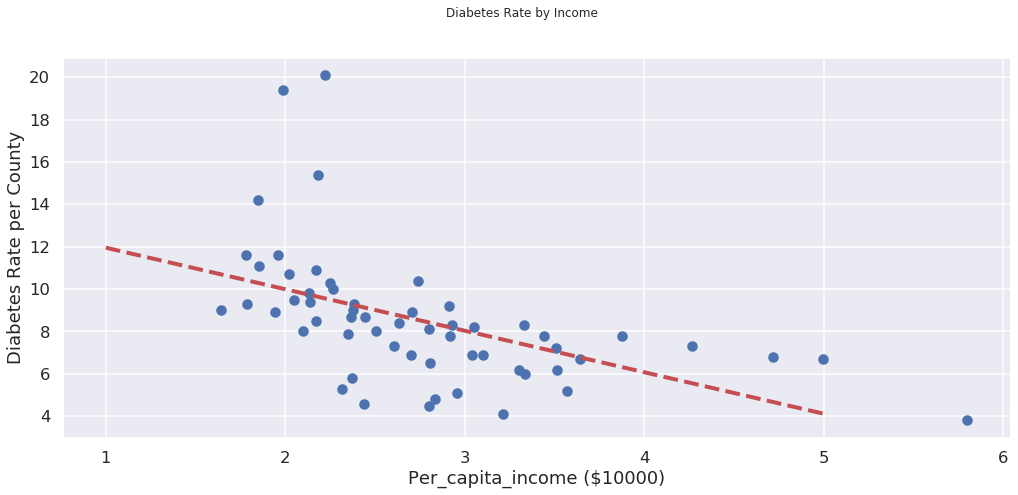

In [29]:
#Scatter plot of income level and diabetes rate + the best fit line for the two variables
plt.figure(figsize=(17, 7))
plt.scatter(df_merge['Per_capita_income'], df_merge['Diabetes'])

x = np.arange(1, 6)
y = -1.9585 * x + 13.9115
plt.plot(x, y, '--r', linewidth=4)
plt.xlabel('Per_capita_income ($10000)')
plt.ylabel('Diabetes Rate per County')
plt.suptitle('Diabetes Rate by Income')
plt.show()

We use linear regression model to analyze the relationship between income per capita and diabete rates. In the above visualization, x axis is the per capita income, and the y axis is the diabete rate for each county. There are a few outliers in this visualization, namely the four dots way above the regression line. If those were to be removed, the regression line would be less inclined. 

From this regression result, we learned that per capita income and diabetes rate per county are negatively related, meaning the lower per capita income a county has, the higher chances for the county residents to have diabete. Which is what we expected. From the OLS regression result, we found that the p value is smaller than 0.05, indicating that per capita income is an important predictor of diabetes rate. We also found that the R-squared value is 0.264, indicating that this linear model is not an ideal model of the relationship between per capita income and diabete rate.

## Diabete vs Poverty rate
In addition to income per capita, we also explored the relationship between diabetes rate and poverty rate for each county. Here, we first perform a base 10 logarithmic transform of the poverty rate data. The reason for doing a logarithmic transform is to make the data more sensible in visualization and more intuitional for us to understand.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7084b39c18>,
      dtype=object)

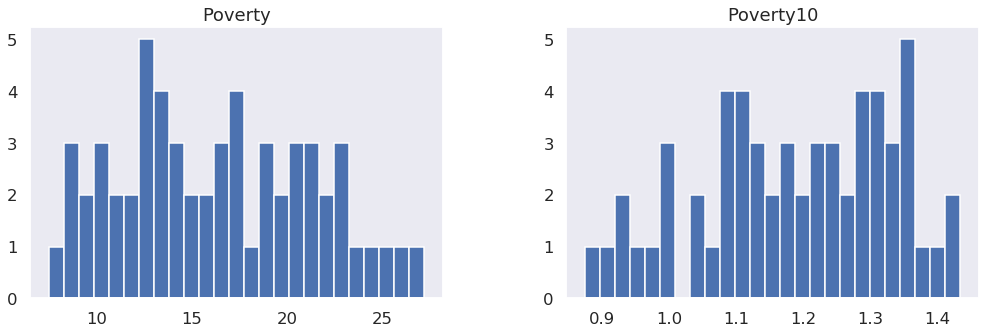

In [30]:
# Do a log10 transform of poverty
df_merge['Poverty10'] = df_merge['Poverty'].transform(np.log10)

# Plot histogram of poverty and poverty10
df_merge.hist(['Poverty', 'Poverty10'], bins = 25, grid = False, figsize = (17, 5))

In [31]:
#linear regression of diabetes from poverty
outcome_2, predictor_2 = patsy.dmatrices('Diabetes ~ Poverty10', df_merge)
mod = sm.OLS(outcome_2, predictor_2)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               Diabetes   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     10.22
Date:                Thu, 19 Mar 2020   Prob (F-statistic):            0.00228
Time:                        22:36:08   Log-Likelihood:                -143.03
No. Observations:                  58   AIC:                             290.1
Df Residuals:                      56   BIC:                             294.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.7239      3.222     -0.535      0.5

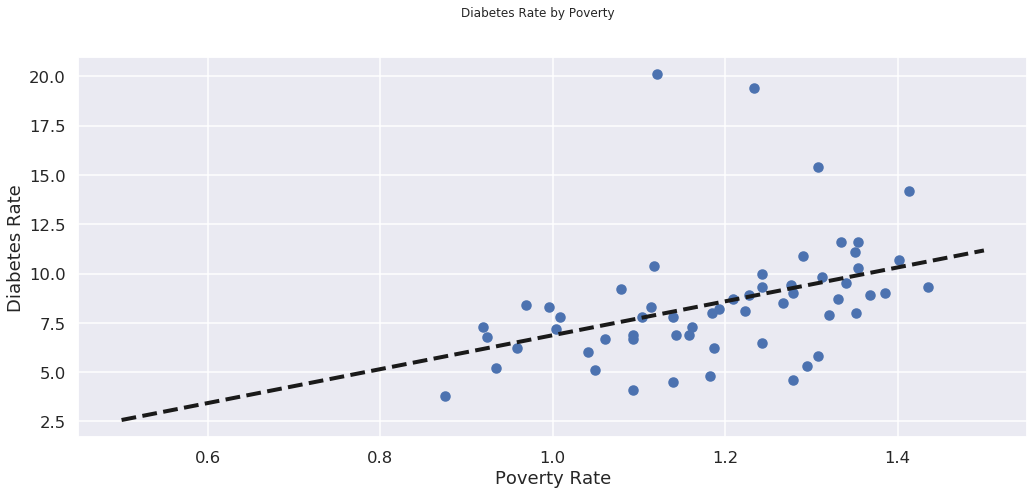

In [32]:
# Scatter plot of poverty and diabetes with linear regression
plt.figure(figsize = (17, 7))
plt.scatter(df_merge['Poverty10'], df_merge['Diabetes'])
x = np.arange(.5, 2.0)
y = 8.5961 * x - 1.7239
plt.plot(x, y, '--k', linewidth=4)
plt.xlabel('Poverty Rate')
plt.ylabel('Diabetes Rate')
plt.suptitle('Diabetes Rate by Poverty')
plt.show()

We use linear regression model to analyze the relationship between poverty rate and diabete rates. In the above visualization, x axis is the poverty rate for each county, and the y axis is the diabete rate for each county. There are a few outliers in this visualization, mainly the two blue dots way above the regression line on the right hand side. If those were to be removed, the regression line would be less inclined, and the coefficient to be less than the prediction result.

From this regression result, we learned that poverty rate and diabetes rate per county are positively related. The result means that the higher poverty rate a county has, the higher chances for the county residents to have diabete, which is what we expected. From the OLS regression result, we found that the p value is smaller than 0.05, indicating that poverty rate is an important predictor of diabetes rate. We also found that the R-squared value is 0.154, indicating that this linear model is not an ideal model of the relationship between poverty rate and diabete rate.



## Number of hospitals vs per capita income
We are also interested in the relationship between number of hospital of a county and the per capita income of the county. We wonder if the income level would potentially affect the number of hospital, which indicate the medical resource of a county. This could be a potential confounding variable for our study.

In [33]:
#Perform a inear regression test on income level and number of hospital in search for correlation
outcome_3, predictors_3 = patsy.dmatrices('Number_of_hospitals ~ Per_capita_income', df_merge)
mod_3 = sm.OLS(outcome_3, predictors_3)
res_3 = mod_3.fit()
print(res_3.summary())

                             OLS Regression Results                            
Dep. Variable:     Number_of_hospitals   R-squared:                       0.018
Model:                             OLS   Adj. R-squared:                  0.000
Method:                  Least Squares   F-statistic:                     1.007
Date:                 Thu, 19 Mar 2020   Prob (F-statistic):              0.320
Time:                         22:36:09   Log-Likelihood:                -247.80
No. Observations:                   58   AIC:                             499.6
Df Residuals:                       56   BIC:                             503.7
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.3585

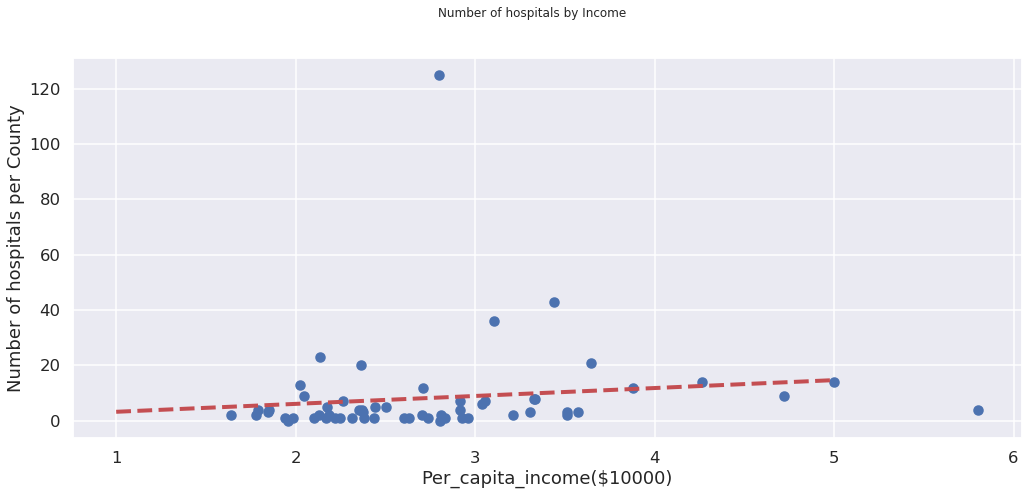

In [34]:
#Scatter plot of income level and number of hospital + the best fit line for the two variables
plt.figure(figsize=(17, 7))
plt.scatter(df_merge['Per_capita_income'], df_merge['Number_of_hospitals'])

x = np.arange(1, 6)
y = 2.8619 * x + 0.3585
plt.plot(x, y, '--r', linewidth=4)
plt.xlabel('Per_capita_income($10000)')
plt.ylabel('Number of hospitals per County')
plt.suptitle('Number of hospitals by Income')
plt.show()

We use linear regression model to analyze the relationship between per capita income and number of hospital in a county. In the above visualization, x axis is the per capita income for each county, and the y axis is the number of hospital for each county. There are one outliers in this visualization. If it were to be removed, the regression line would be less inclined, and the coefficient to be less than the prediction result.

From the OLS regression result, we found that the p value is larger than 0.05, indicating that per capita income is not an important predictor of number of hospitals in a county. We also found that the R-squared value is 0.018, indicating that this linear model is far away from being called ideal for the relationship between per capita income and number of hospitals in a county.


## Number of hospitals vs Population
After we found out that the relationship between income level and number of hospital is not significant, we are interested in if population of a county would potentially affect the number of hospital in a county.

In [35]:
#Perform a inear regression test on population and number of hospital in search for correlation
outcome_4, predictors_4 = patsy.dmatrices('Number_of_hospitals ~ Population', df_merge)
mod_4 = sm.OLS(outcome_4, predictors_4)
res_4 = mod_4.fit()
print(res_4.summary())

                             OLS Regression Results                            
Dep. Variable:     Number_of_hospitals   R-squared:                       0.982
Model:                             OLS   Adj. R-squared:                  0.981
Method:                  Least Squares   F-statistic:                     3014.
Date:                 Thu, 19 Mar 2020   Prob (F-statistic):           2.18e-50
Time:                         22:36:09   Log-Likelihood:                -132.20
No. Observations:                   58   AIC:                             268.4
Df Residuals:                       56   BIC:                             272.5
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3045      0.348      0.87

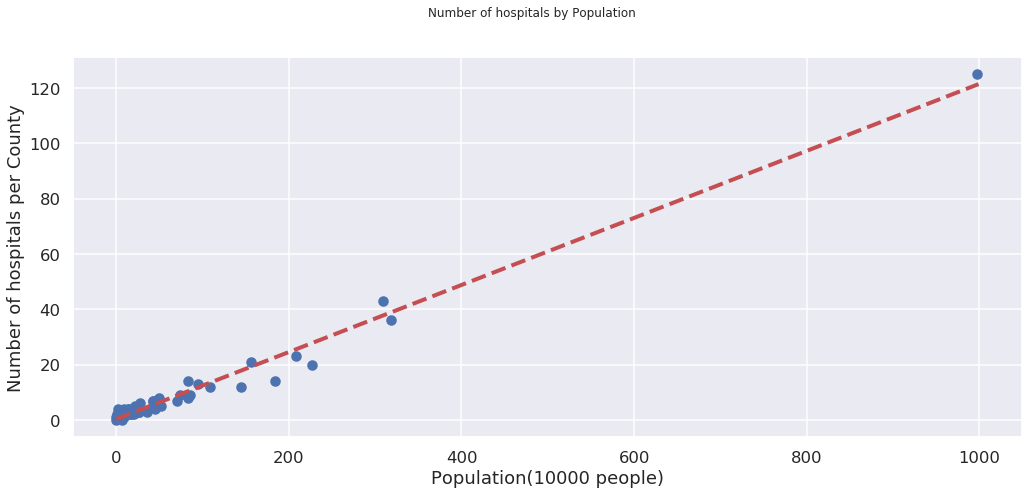

In [36]:
#Scatter plot of population and number of hospital + the best fit line for the two variables
plt.figure(figsize=(17, 7))
plt.scatter(df_merge['Population'], df_merge['Number_of_hospitals'])

x = np.arange(0, 1000)
y = 0.1212 * x + 0.3045
plt.plot(x, y, '--r', linewidth=4)
plt.xlabel('Population(10000 people)')
plt.ylabel('Number of hospitals per County')
plt.suptitle('Number of hospitals by Population')
plt.show()

We use linear regression model to analyze the relationship between population and number of hospital. In the above visualization, x axis is the county population, and the y axis is the number of hospital for each county. There are no outliers in this visualization.

From this regression result, we learned that population and number of hospital per county are positively and strongly related.  The result means that the higher a county's population is, the higher the number of hospital a county possesses. From the OLS regression result, we found that the p value is smaller than 0.05, indicating that population is an important predictor of the number of hospital in a county. We also found that the R-squared value is 0.982, indicating that this linear model is a very ideal model of the relationship between population and number of hospitals in a county.

## Different diet preference for high and low income level people

Studies discover that excessive amount of fat, cholesterol, salt, and sugar intake will likely induce diabetes. So we explore the difference in diet preference for high income population vs low income population to see if this is a potential factors that affect diabete rate.


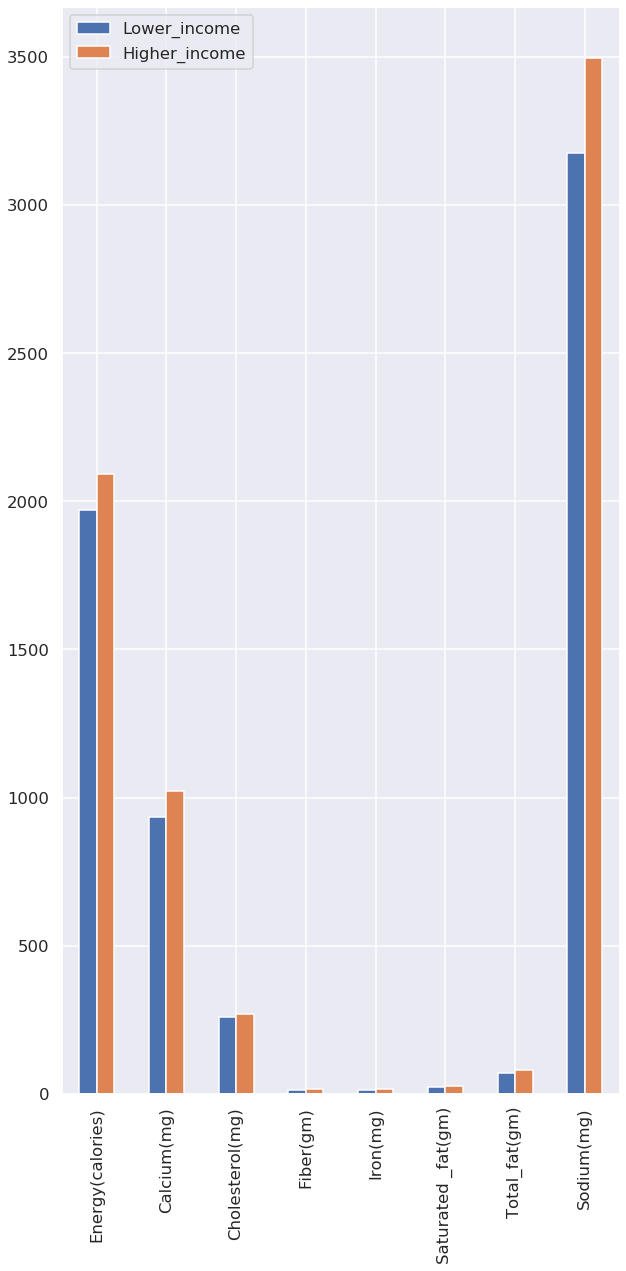

In [37]:
#Do a grouped bar plot to demonstrate the difference between the general nutrition intake of higher income group and that of lower income group
pd.concat([df_nutrition.loc[0, "Energy(calories)":].rename("Lower_income"), df_nutrition.loc[1, "Energy(calories)":].rename("Higher_income")],axis=1).plot.bar(figsize=(10,20))

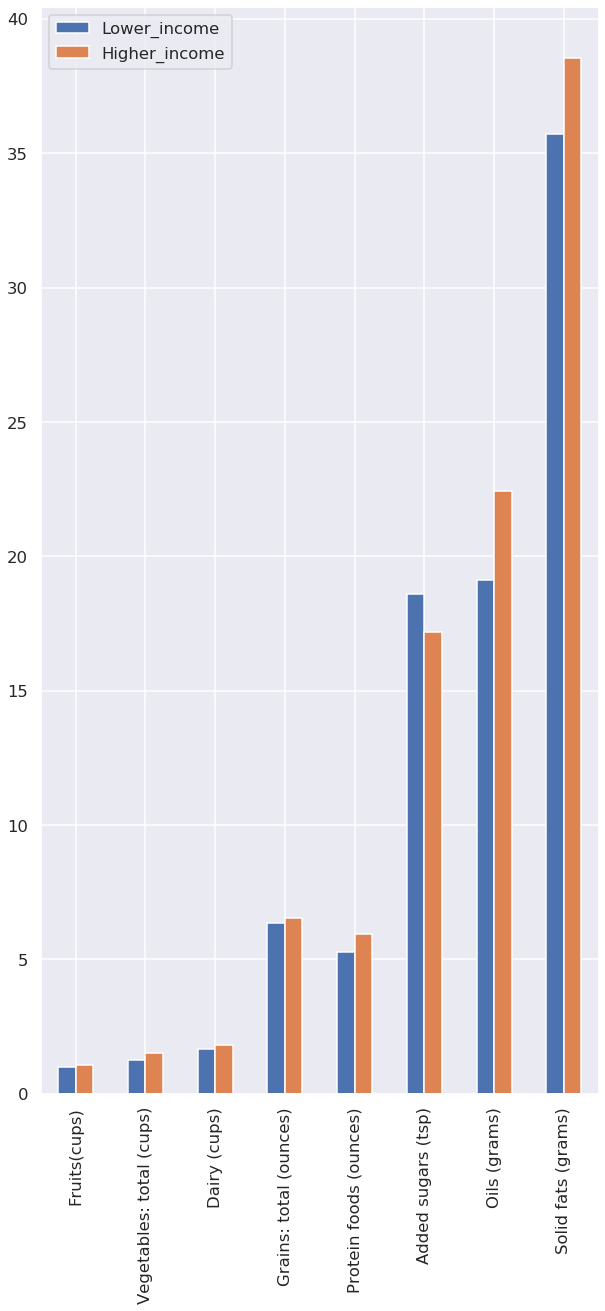

In [38]:
#Do a grouped bar plot to demonstrate the difference between the general food intake of higher income group and that of lower income group
pd.concat([df_food.loc[0, "Fruits(cups)":].rename("Lower_income"), df_food.loc[1, "Fruits(cups)":].rename("Higher_income")],axis=1).plot.bar(figsize=(10,20))

These group bar charts indicate that the higher income group averagely consume more of everything daily than the lower income except for added sugars. According to the dataset, the higher income group averagely consume 17.18 teaspoons of added sugar daily, while the lower income group averagely consume 18.59 teaspoons of added sugar daily. 

One thing to notice is that the higher income group averagely consume more frits and vegatables daily than the lower income group. According to the dataset, the higher income group averagely consume 1.08 cups of added sugar daily, while the lower income group averagely consume 1.01 teaspoons of added sugar daily. The higher income group averagely consume 1.53 cups of added sugar daily, while the lower income group averagely consume 1.26 teaspoons of added sugar daily.

While studies do suggest that consuming fibers help prevent diabetes, the difference between the average daily intake of fibers of the higher income group and that of the lower income group is too small to be called significant. The relatively more significant difference between the average daily intake of added sugars of the higher income group and that of the lower income group might indicate that added sugar consumption is the factor that is influencing diabetes rate of counties.

# Ethics & Privacy

All data involved in this project are published for public use by Wikipedia, the United States Department of Agriculture, Centers for Disease Control and Prevention. They are available for us to use without restrictions. The data was gathered with the knowledge and consent of participants, who were made aware of potential future use of the gathered data. Name, SSN, location and other sensitive, detailed personal information are not included in these datasets. 

We hypothesis that people of lower-income are more prone to diabetes because of unhealthy diets and discriminative medical resource allocation. We are not making the point that people who have low income are unhealthy and tend to have diabetes. The purpose of this research is to bring attention to the welfare and the potential health risk for the lower-income group. We are conducting this research in the hope of prompting governmental diary aids and improving health awareness among the lower-income communities.

# Conclusion & Discussion

Our project aimed to study the relationship between income level and the rate of diabetes in the state of California. We hypothesize that people with low-income levels will be more prone to diabetes due to bad dietary choices and lack of medical resources. To test out the hypothesis, we separate income into two aspects, poverty rate, and per capita income. We then make several plots and models to examine the correlations between diabetes rate and income. The results confirmed the first part of our hypothesis: per capita income of a county and the poverty rate of a county are proven to be important predictors of diabetes rate of a county; while per capita income is negatively correlated with diabetes rate, poverty rate is positively correlated with diabetes rate. To test out the second part of our hypothesis regarding the relationship between diabetes rate, income level, and food choice, we plotted two grouped bar plots that demonstrate the difference between the general food intake of higher income group and that of lower income group. The finding that the lower income group averagely consume significantly more added sugar than the higher income group indicates that the relationship between income level and diabetes rate is possiblely a result of distinctive food choice. To test out the second part of our hypothesis regarding the relationship between diabetes rate, income level, and allocation of medical resources, we examine the relationship between the income level of a county and the number of hospitals in the county using a linear regression test. It turns out that there is a weak correlation between the income level of a county and the number of hospitals in the county. However, after examining the relationship between the population of a county and the number of hospitals in the county usirng a linear regression test, we find out that the number of hospitals in a county is positively significantly correlated with the population of the county. These results indicate that the relationship between income level and diabetes rate is not likely a result of discriminative medical resource allocation.

#### Limitations:
Data on food and nutrition intake is generalized to the entire American population instead of the California population.
Per capita income per county might not be specific enough for the purpose of this project. A certain county could include communities that are of high income and communities that are of low income simultaneously.

In addition, we analyzed the income level per capita in each county in California. It may not represent all population in each county well, since people like children, seniors, housewives and the homeless may not have income.

#### Confounding Variables:
Food choice is a possible confounding variable for the correlation between income level and diabete rate. We anticipated that personal food choice is largely influenced by one's personal values, which is further correlated with his/her personal economic status. We correctly addressed this in our hypothesis. Scientific researches indicate that excessive sugar intake is likely a factor that causes diabetes. Our findings indicate that people in the lower income group are more prone to diabetes possibly due to excessive sugar intake.

# Team Contributions

- Baojun Tang: Project Proposal, looking for datasets, all codes except parts about poverty rate, annotation, conclusion.
- Shuyang Miao: analyzing and providing annotation to each table.
- Yijia He: Project Proposal, Overview, Datasets, Ethics&Privacy, Codes about df_poverty (including loading, cleaning and analyzing this dataset)
- Juncong Shi: Project Proposal，Conclustion& Discussion